In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from scipy import stats

In [2]:
df = {}

csv_file = "coal_price_data.csv"
csv_date = "date"
csv_file = csv_file.split(".")[0]
df[csv_file] = pd.read_csv(f"../coal-price-data/{csv_file}.csv")
df[csv_file]["datetime"] = pd.to_datetime(df[csv_file][csv_date], format="%b-%y")

csv_path = "../coal-price-data/fred/"
csv_date = "DATE"
csv_date_start = "2011-11-01"
csv_date_end = "2023-12-01"
csv_list = os.listdir(csv_path)
for csv_file in csv_list:
    csv_file = csv_file.split(".")[0]
    df[csv_file] = pd.read_csv(f"../coal-price-data/fred/{csv_file}.csv")
    df[csv_file]["datetime"] = pd.to_datetime(df[csv_file][csv_date], format="%Y-%m-%d")
    df[csv_file] = df[csv_file].loc[
        (df[csv_file]["datetime"] >= csv_date_start) & (df[csv_file]["datetime"] < csv_date_end)
    ]

In [3]:
df["M2SL"]

DATE     M2SL   datetime
634  2011-11-01   9612.6 2011-11-01
635  2011-12-01   9660.1 2011-12-01
636  2012-01-01   9733.3 2012-01-01
637  2012-02-01   9785.7 2012-02-01
638  2012-03-01   9830.6 2012-03-01
..          ...      ...        ...
774  2023-07-01  20863.8 2023-07-01
775  2023-08-01  20825.6 2023-08-01
776  2023-09-01  20755.4 2023-09-01
777  2023-10-01  20725.7 2023-10-01
778  2023-11-01  20767.5 2023-11-01

[145 rows x 3 columns]

In [4]:
print(df["coal_price_data"].min())
print(df["coal_price_data"].max())
print(df["M2SL"].min())
print(df["M2SL"].max())

year                        2011
date                      Apr-12
newcastle                   48.8
HBA                        49.42
ICI_1                      52.93
datetime     2011-12-01 00:00:00
dtype: object
year                        2023
date                      Sep-23
newcastle                  433.7
HBA                       330.97
ICI_1                     277.62
datetime     2023-12-01 00:00:00
dtype: object
DATE                 2011-11-01
M2SL                     9612.6
datetime    2011-11-01 00:00:00
dtype: object
DATE                 2023-11-01
M2SL                    21703.5
datetime    2023-11-01 00:00:00
dtype: object


In [5]:
y = "newcastle"
fig = px.line(df["coal_price_data"], x="datetime", y=y, labels={"Month": "Date"})
fig.update_layout(
    template="simple_white",
    font=dict(size=18),
    title_text="Coal Price",
    width=650,
    title_x=0.5,
    height=400,
)
fig.show()

In [6]:
y = "M2SL"
fig = px.line(df[y], x="datetime", y=y, labels={"Month": "Date"})
fig.update_layout(
    template="simple_white",
    font=dict(size=18),
    title_text=y,
    width=650,
    title_x=0.5,
    height=400,
)
fig.show()

In [11]:
x = df["coal_price_data"].newcastle
y = df["coal_price_data"].ICI_1

slope, intercept, r, p, std_err = stats.linregress(x, y)

In [12]:
print(f"slope: {slope}")
print(f"intercept: {intercept}")
print(f"r: {r}")
print(f"p: {p}")
print(f"std_err: {std_err}")

slope: 0.600533935403765
intercept: 33.65381401159914
r: 0.9606500704209069
p: 1.9310655623962052e-81
std_err: 0.01452032511898455


In [13]:
x = df["coal_price_data"]["newcastle"]
y = df["M2SL"]["M2SL"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

In [14]:
print(f"slope: {slope}")
print(f"intercept: {intercept}")
print(f"r: {r}")
print(f"p: {p}")
print(f"std_err: {std_err}")

slope: -20.46182026230733
intercept: 17246.85603449831
r: -0.4331490046040797
p: 5.279632704944257e-08
std_err: 3.5605661278914575


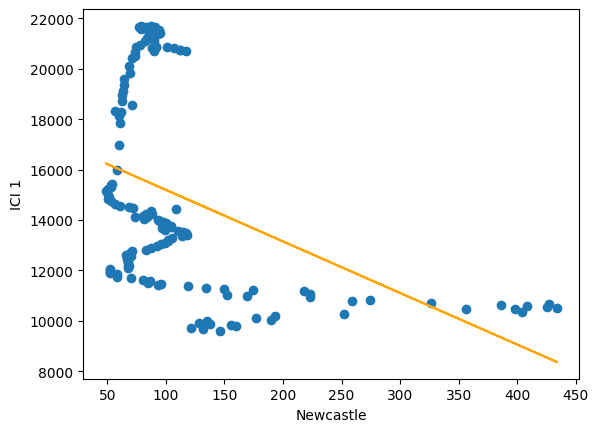

In [15]:
def myfunc(x):
    return slope * x + intercept


mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel, color="orange")
plt.xlabel("Newcastle")
plt.ylabel("ICI 1")
plt.show()